Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).

Make sure that in addition to the code, you provide written answers for all questions of the assignment. 

Below, please fill in your name:

# Assignment 3 - Linear Regression

In this assignment, we will be building a linear regression model to understand the drivers which influence car prices. 

The car_data.csv dataset contains the following data points about car prices:

- 1 Car_Name - the model of the car
- 2 Year - the year of the car
- 3 Selling_Price - the current selling price of the used car
- 4 Present_Price - the price of the same car, but new
- 5 Kms_Driven - how many kms have been driven
- 6 Fuel_Type - diesel or gas
- 7 Seller_Type - sold by a dealer or individual seller
- 8 Transmission - standard or automatic
- 9 Owner - number of owners


Complete the following:

**Data Preparation**

**Question 1** _(3 points)_
* Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

**Question 2** _(3 points)
* Create a new column which captures the age of the car as 'new' or 'old'.

**Question 3** _(3 points)
* Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

**Exploratory Analysis**

**Question 4** _(3 points)_
* Conduct exploratory analysis for the categorical variables. What are you findings?

**Question 5** _(10 points)_
* Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?


**Regression Model**

**Question 6** _(1 point)_
* Based on the insights identified, state a hypothesis which you can test with a regression model.  

**Question 7** _(5 points)_
* Build a linear regression model based on your hypothesis. Interpret the results.

**Question 8** _(2 points)_
* How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats

In [2]:
df=pd.read_csv(r'C:\Users\User\Downloads\car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


Question 1 Create dummy variables for the Fuel_Type, Transmission and Seller_Type variables.

In [4]:
Fuel_Type_Variables= pd.get_dummies(df['Fuel_Type'])
Transmission_Variables = pd.get_dummies(df['Transmission'])
Seller_Type_Variables= pd.get_dummies(df['Seller_Type'])

In [5]:
df=pd.concat([df,Fuel_Type_Variables],axis=1)
df=pd.concat([df,Transmission_Variables],axis=1)
df=pd.concat([df,Seller_Type_Variables],axis=1)

In [6]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
  display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0


Question 2 Create a new column which captures the age of the car as 'new' or 'old'.

In [7]:
def status(Year):
    if Year>2017:
        cat='new'
    if Year<=2017:
        cat='old'
    return cat

In [8]:
df['status']=df['Year'].apply(status)

In [9]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
  display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,status
0,ritz,2014,3.35,5.590,27000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
1,sx4,2013,4.75,9.540,43000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
2,ciaz,2017,7.25,9.850,6900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
3,wagon r,2011,2.85,4.150,5200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
4,swift,2014,4.60,6.870,42450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
5,vitara brezza,2018,9.25,9.830,2071,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,new
6,ciaz,2015,6.75,8.120,18796,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
7,s cross,2015,6.50,8.610,33429,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
8,ciaz,2016,8.75,8.890,20273,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
9,ciaz,2015,7.45,8.920,42367,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old


Question 3 Scale the Kms_Driven, Selling_Price, and Present_Price variables (i.e. ensure the variables have the same scale - thousands or tens. You can choose whichever scale you prefer).

In [10]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual
count,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189,0.006645,0.199336,0.794020,0.132890,0.867110,0.647841,0.352159
std,2.891554,5.082812,8.644115,38886.883882,0.247915,0.081378,0.400166,0.405089,0.340021,0.340021,0.478439,0.478439
min,2003.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df['Kms_Driven']=df['Kms_Driven']/1000

In [12]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
  display(df)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,CNG,Diesel,Petrol,Automatic,Manual,Dealer,Individual,status
0,ritz,2014,3.35,5.590,27.000,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
1,sx4,2013,4.75,9.540,43.000,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
2,ciaz,2017,7.25,9.850,6.900,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
3,wagon r,2011,2.85,4.150,5.200,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
4,swift,2014,4.60,6.870,42.450,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
5,vitara brezza,2018,9.25,9.830,2.071,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,new
6,ciaz,2015,6.75,8.120,18.796,Petrol,Dealer,Manual,0,0,0,1,0,1,1,0,old
7,s cross,2015,6.50,8.610,33.429,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
8,ciaz,2016,8.75,8.890,20.273,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old
9,ciaz,2015,7.45,8.920,42.367,Diesel,Dealer,Manual,0,0,1,0,0,1,1,0,old


In [13]:
#Python Data Scaling – Standardization
cols = ['Kms_Driven', 'Selling_Price', 'Present_Price']

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
std_scaler = StandardScaler()

In [16]:
Stand_Sc = std_scaler.fit_transform(df[cols].iloc[:,range(0,3)].values)

<AxesSubplot:ylabel='Density'>

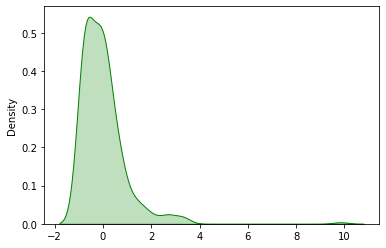

In [17]:
sns.kdeplot(Stand_Sc[:,2],fill=True, color = 'Green')

Question 4 Conduct exploratory analysis for the categorical variables. What are you findings?

In [18]:
obj_cols = df.select_dtypes(object).columns.values.tolist()
num_cols = df.select_dtypes(np.number).columns.values.tolist()

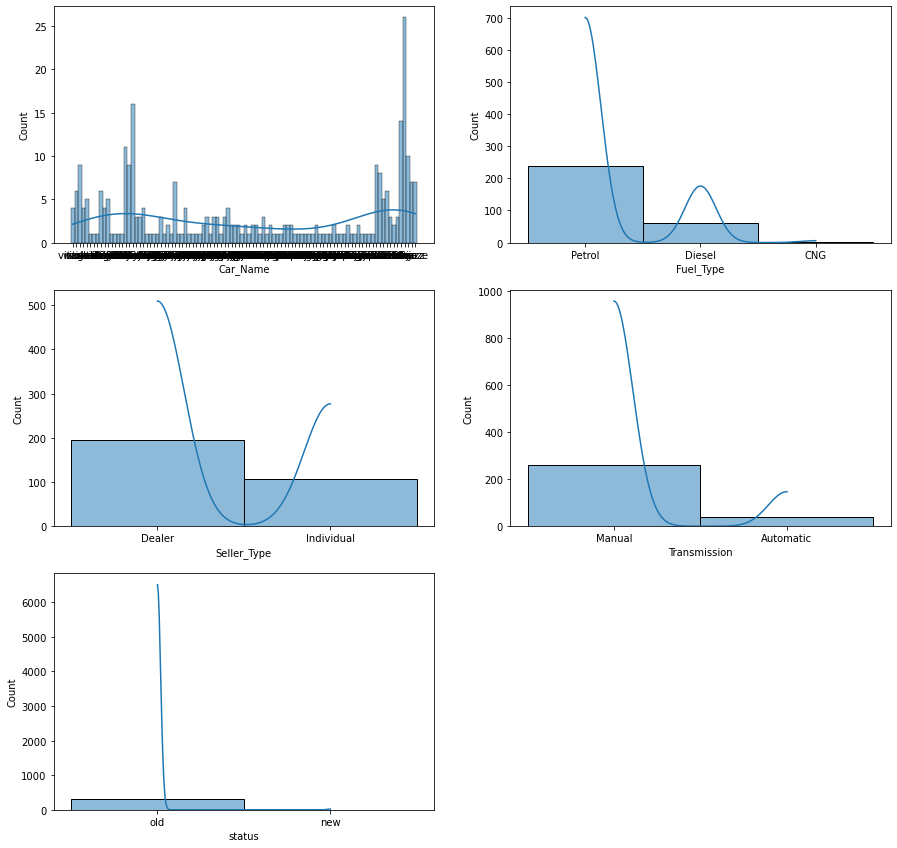

In [19]:
fig = plt.figure(figsize=[15, 20])
for col in range(len(obj_cols)):
    plt.subplot(4,2,col+1)
    sns.histplot(x=obj_cols[col], data=df, kde=True)

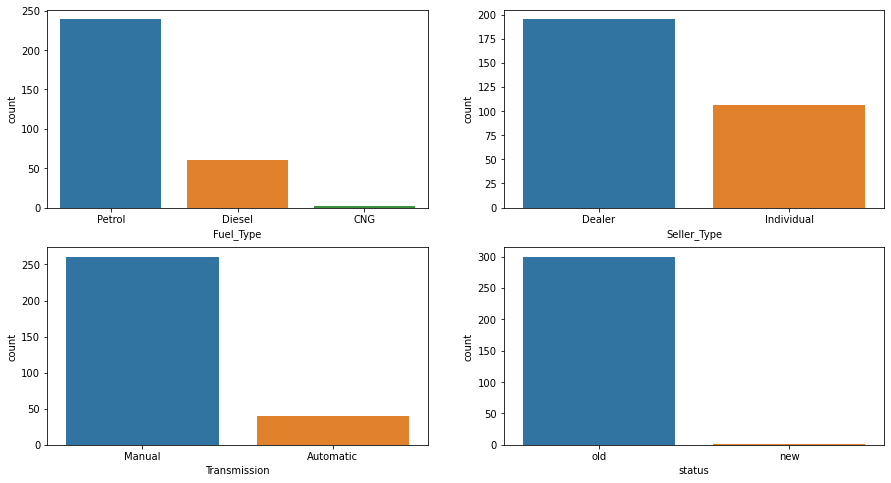

In [20]:
obj_cols.remove('Car_Name')
fig = plt.figure(figsize=[15,8])
for col in range(len(obj_cols)):
    plt.subplot(2,2,col+1)
    sns.countplot(x=obj_cols[col], data=df)

There are more Petrol than Diesel than CNG, more Dealer than Individual, more Manual than Automatic and more Old than New.

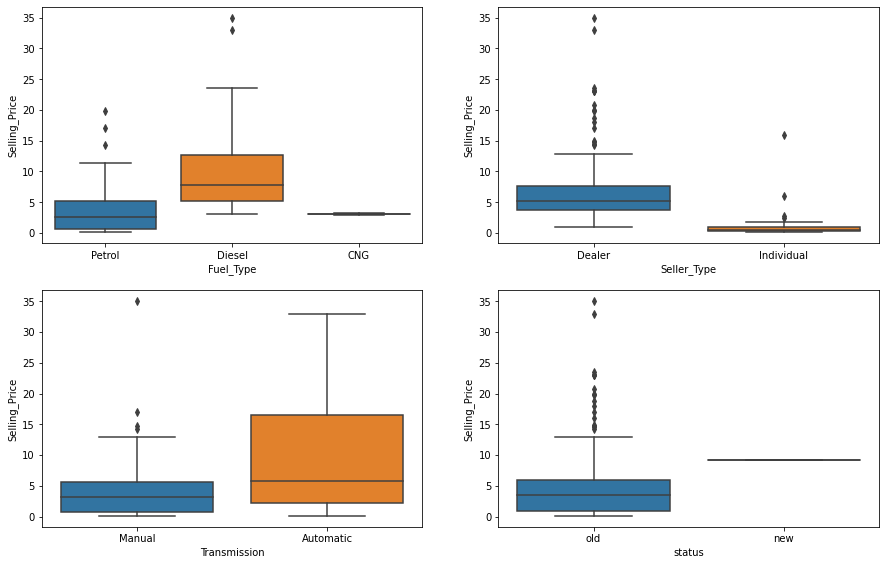

In [21]:
fig = plt.figure(figsize=[15, 20])
for col in range(len(obj_cols)):
    plt.subplot(4,2,col+1)
    sns.boxplot(x=obj_cols[col], y='Selling_Price', data=df)

Generally speaking, the selling price of Diesel is higher than Petrol, Dealer higher than Individual, Automatic higher than Manual and New higher than Old.

Text(0.5, 1.0, 'Car Brands vs Selling Price')

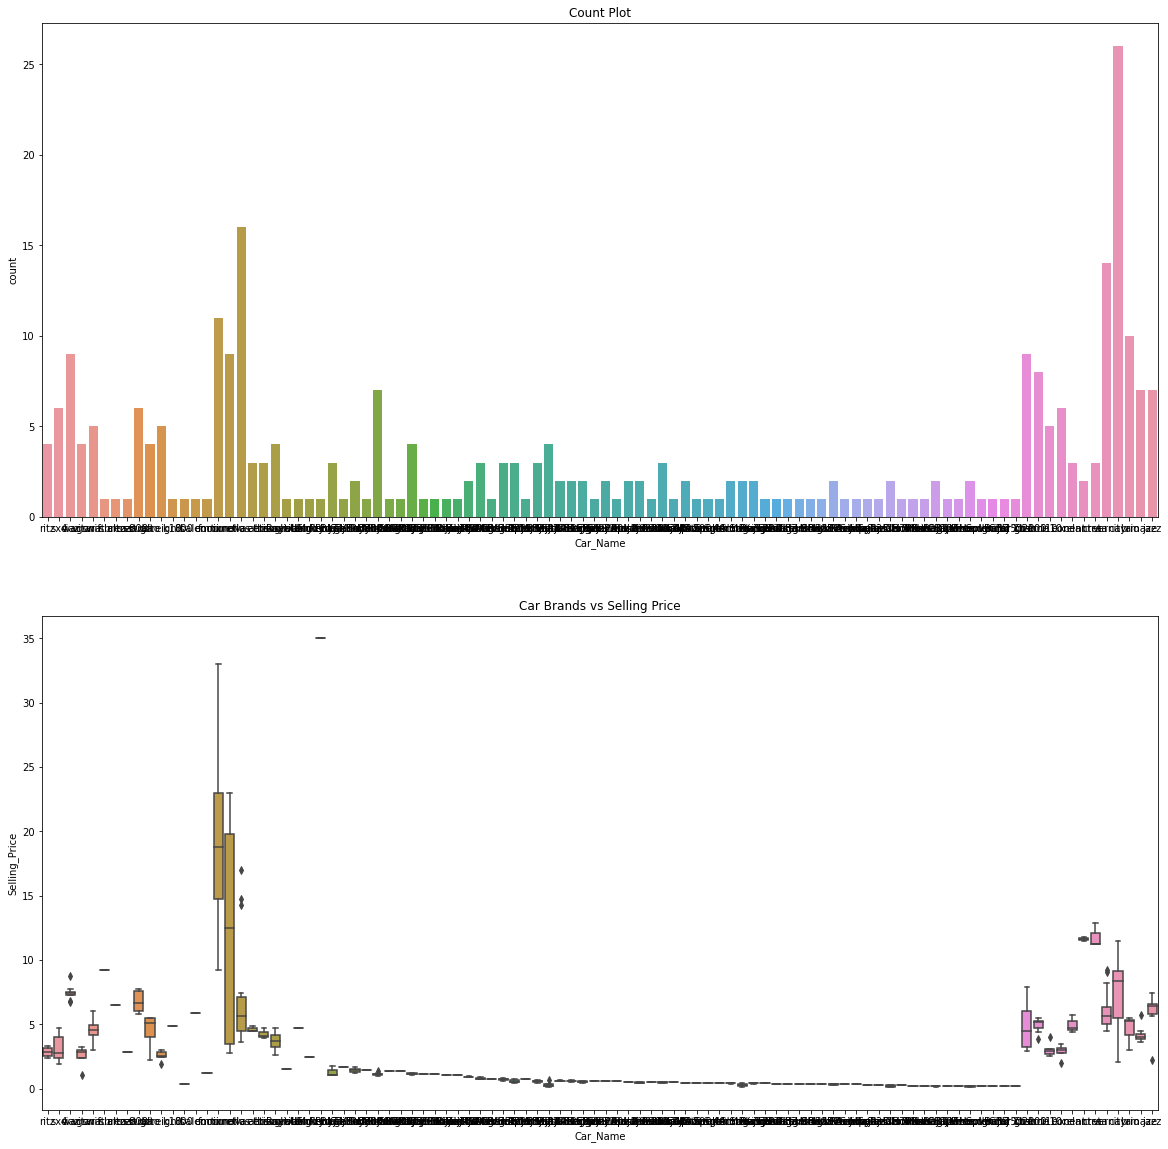

In [22]:
fig, ax = plt.subplots(2,1, figsize=[20, 20])
sns.countplot(ax = ax[0], x='Car_Name', data=df).set_title('Count Plot')
sns.boxplot(ax = ax[1], x='Car_Name', y='Selling_Price', data=df).set_title('Car Brands vs Selling Price')

Several brands have higher prices compared to other brands.

Question 5 Conduct exploratory analysis for the continuous variables. Ensure you review each variable by itself, and in combination with the other variables to identify insights and trends. What are your findings?

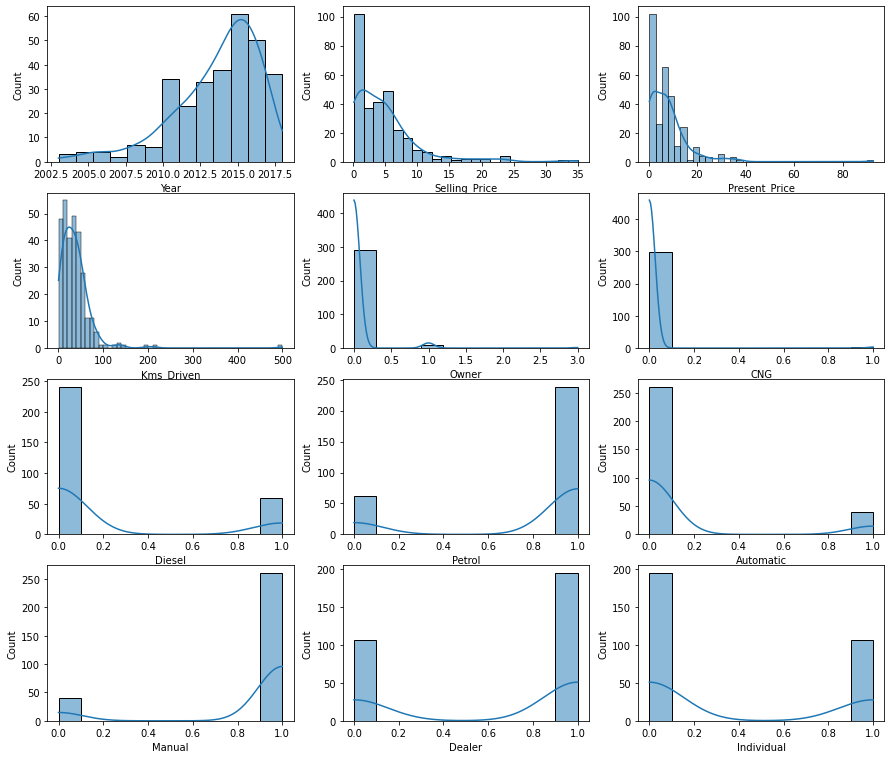

In [23]:
fig = plt.figure(figsize=[15, 20])
for col in range(len(num_cols)):
    plt.subplot(6,3,col+1)
    sns.histplot(x=num_cols[col], data=df, kde=True)

The above plot shows very weak relationship between selling_price and km_driven.

The more recent the year is, the selling_price range is higher.

In [24]:
num_cols.append('Selling_Price')

<AxesSubplot:>

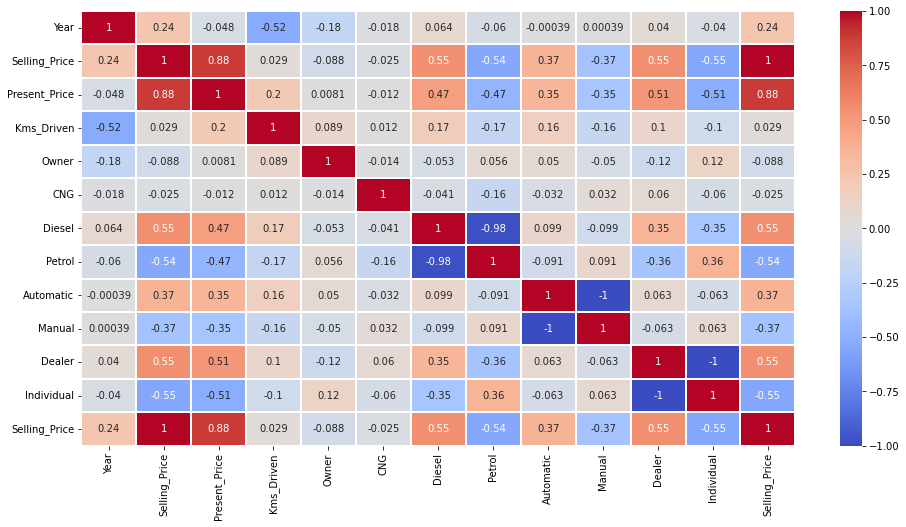

In [25]:
plt.figure(figsize=(16,8))
sns.heatmap(df[num_cols].corr(), annot=True, linewidths=2, cmap= 'coolwarm')

The above heatmap shows that the correlation between present_price and selling_price is very high, So there is no need to retain both as they both will be showing same effect. So we can drop present_price. The correlation of Owner with each variables is very weak which can also be dropped. The correlation of CNG with each variables is very weak which can also be dropped.

Question 6 Based on the insights identified, state a hypothesis which you can test with a regression model

Based on the insights identified, we can assume that selling price is higher corrleated with the types and conditions of the cars, such as Year, Diesel, Automatic and Dealer; and we will test with a regression model.

Question 7 Build a linear regression model based on your hypothesis. Interpret the results.

In [26]:
Y = df['Selling_Price']
X = df[['Year','Diesel','Automatic','Dealer']]
X = sm.add_constant(X)

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [27]:
results = sm.OLS( Y, X ).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sun, 10 Jul 2022   Prob (F-statistic):           1.24e-54
Time:                        08:15:14   Log-Likelihood:                -785.23
No. Observations:                 301   AIC:                             1580.
Df Residuals:                     296   BIC:                             1599.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -695.7053    133.536     -5.210      0.000    -958.506    -432.905
Year           0.3457      0.066      5.213      0.000       0.215       0.476
Diesel         4.7214      0.513      9.204      0.000       3.712       5.731
Automatic      4.5693      0.566      8.076      0.000       3.456       5.683
Dealer         4.1781      0.427      9.778      0.000       3.337       5.019
==============================================================================
Omnibus:                      219.794   Durbin-Watson:                   1.667
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4140.870
Skew:                           2.727   Prob(JB):                         0.00
Kurtosis:                      20.333   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
results.params

const       -695.705260
Year           0.345700
Diesel         4.721355
Automatic      4.569272
Dealer         4.178058
dtype: float64

The R-2 is 0.581, the model is not bad to explain the outcome. 
The Diesel, Automatic and Dealer are higher coefficient factors compared to Year. However, std err of Year is much smaller compared to the other three. As the smaller it is, the more precise. We can see that the model was more accurately able to estimate the Yaer coefficient than the other three coefficient.
We want to look at the prob(f-statistic) line, where we are looking to see if the value is less than 0.05 to determine that the model is statistically significant. In this case it is far below 0 - this means that it is significant. 

Question 8 How could you make your model better? Is there data that you think would be helpful to achieve a higherd R2 value?

In [29]:
data_dummies = pd.get_dummies(df, drop_first=True)

In [30]:
data_dummies = data_dummies.drop(data_dummies[data_dummies['Kms_Driven'] > 600000].index).reset_index(drop=True)

In [31]:
data_dummies.dropna(inplace=True)

In [32]:
data_dummies.isnull().mean().round(4).mul(100).sort_values(ascending=False).head()

Year                      0.0
Car_Name_elantra          0.0
Car_Name_creta            0.0
Car_Name_corolla altis    0.0
Car_Name_corolla          0.0
dtype: float64

In [33]:
y = data_dummies['Selling_Price']
x = data_dummies.drop('Selling_Price', axis=1)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [35]:
y_train = np.log(y_train)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
Lr = LinearRegression()

In [37]:
Lr.fit(x_train, y_train)

LinearRegression()

In [38]:
Lr.score(x_train, y_train)

0.9928071124941201

In [39]:
yPred = Lr.predict(x_train)

In [40]:
r2_score(yPred, y_train)

0.9927549740958747